In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.



#### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.
- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?
- How likely is it that the drive through gets at least 1 car?

In [2]:
stats.poisson(2).pmf(0)

0.1353352832366127

<BarContainer object of 12 artists>

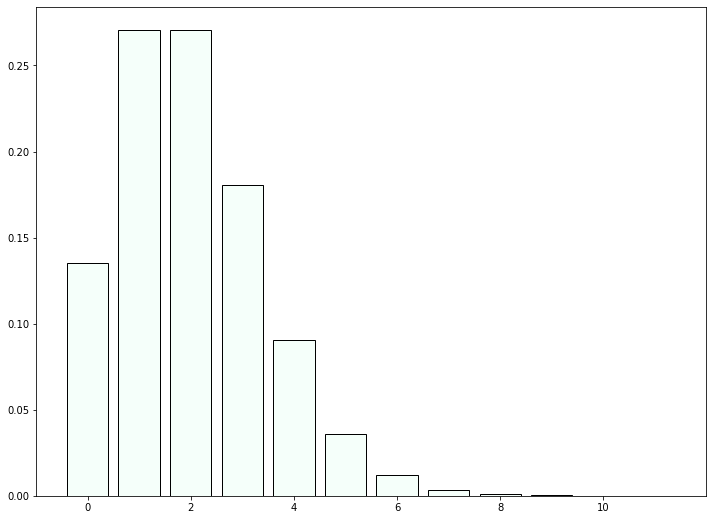

In [3]:
plt.figure(figsize=(12, 9))
x = np.arange(0,12)
y = stats.poisson(2).pmf(x)
plt.bar(x, y, ec='black', fc='mintcream')